In [2]:
import numpy as np
import pickle
import json
import copy
import pandas as pd
from tqdm import tqdm
import random

from perturbations import *
from helpers import *

# Read in data

Vocab

In [3]:
from Vocab import Vocab
vocab = Vocab('data/vocab.csv', 3)

Initialising vocab from file.


Segment data

In [4]:
from SegmentDataset import SegmentDataset

segment_test_set = SegmentDataset(
    data_dir='data/',
    segment_file='segments.json',
    vectors_file='vectors.json',
    split='test'
)

print("Testing the SegmentDataset class item getter...")
print("Dataset contains {} segment samples".format(len(segment_test_set)))
sample_id = 2
sample = segment_test_set[sample_id]
print("Segment {}:".format(sample_id))
print("Image set: {}".format(sample["image_set"]))
print("Target image index(es): {}".format(sample["targets"]))
# print("Target image Features: {}".format([segment_test_set.image_features[sample["image_set"][int(target)]] for target in sample["targets"]]))
print("Encoded segment: {}".format(sample["segment"]))
print("Decoded segment dialogue: {}".format(vocab.decode(sample["segment"])))
print("Segment length: ", sample["length"])
print("\nDone.")

Testing the SegmentDataset class item getter...
Dataset contains 6801 segment samples
Segment 2:
Image set: ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757']
Target image index(es): [6, 2, 3]
Encoded segment: [4, 21, 11, 757, 18, 6, 26, 49, 10, 5, 41]
Decoded segment dialogue: ['-A-', 'one', 'with', 'roses', 'and', 'a', 'white', 'laptop', '?', '-B-', 'nope']
Segment length:  11

Done.


Chain data

In [5]:
from ChainDataset import ChainDataset

print("Testing the ChainDataset class initialization...")

chain_test_set = ChainDataset(
    data_dir='data/',
    segment_file='segments.json',
    chain_file='test_chains.json',
    vectors_file='vectors.json',
    split='test'
)

print("Dataset contains {} cains.".format(len(chain_test_set.chains)))

sample_id = 5
sample = chain_test_set.chains[sample_id]

print("Chain {}:".format(sample_id))
print("Source Game ID: {}".format(sample["game_id"]))
print("Target image index: {}".format(sample["target"]))
print("Chain length: {}".format(len(sample["segments"])))
print("Segment IDs: {}".format(sample["segments"]))
print("Segment lengths: ", sample["lengths"])
print("First segment encoding: {}".format(chain_test_set.segments[sample["segments"][0]]["segment"]))
print("First segment decoded dialogue: {}".format(vocab.decode(chain_test_set.segments[sample["segments"][0]]["segment"])))
print("Second segment decoded dialogue: {}".format(vocab.decode(chain_test_set.segments[sample["segments"][1]]["segment"])))
# print("third segment decoded dialogue: {}".format(vocab.decode(chain_test_set.segments[sample["segments"][2]]["segment"])))

print("Reference chain and segments' associated image sets:")
for segment in sample["segments"]:
    print(vocab.decode(chain_test_set.segments[segment]["segment"]))
    print(chain_test_set.segments[segment]["image_set"])
print("\nDone.")

print("Testing the ChainDataset class item getter...")


Testing the ChainDataset class initialization...
Dataset contains 2811 cains.
Chain 5:
Source Game ID: 3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO
Target image index: 522129
Chain length: 4
Segment IDs: [3, 10, 12, 15]
Segment lengths:  [23, 23, 21, 19]
First segment encoding: [5, 38, 191, 23, 127, 11, 6, 120, 23, 127, 15, 9, 314, 10, 4, 13, 5, 80, 14, 128, 68, 22, 10]
First segment decoded dialogue: ['-B-', 'two', 'plates', 'of', 'food', 'with', 'a', 'bowl', 'of', 'food', 'in', 'the', 'middle', '?', '-A-', 'no', '-B-', 'okay', '.', 'how', 'about', 'you', '?']
Second segment decoded dialogue: ['-A-', 'do', 'you', 'have', 'the', 'one', 'with', 'two', 'plates', 'and', 'the', 'salsa', 'in', 'the', 'middle', '?', '-B-', 'i', 'do', "n't", 'have', 'that', 'one']
Reference chain and segments' associated image sets:
['-B-', 'two', 'plates', 'of', 'food', 'with', 'a', 'bowl', 'of', 'food', 'in', 'the', 'middle', '?', '-A-', 'no', '-B-', 'okay', '.', 'how', 'about', 'you', '?']


Game ids

In [6]:
with open('data/test_ids.json') as json_file:
    game_ids = json.load(json_file)
game_ids

['3Z7EFSHGNACKCBAG5WMPCIYUZO6XCI39JEC7537VZS8M5L5HL7OX19JDYVCD',
 '3RWE2M8QWI8V6P1WRA6WJF5VNDKN0Z33JKGHPFYDSS9383GFTUHCC8QGLNMA',
 '3A1PQ49WVIF33I03KVFJS0R96RAH1C3018Q3ZVOJOCM0R6CJK6H5MIXUERA7',
 '3SB5N7Y3O42PWXKA46T1TVWYJIZ0G031EUONYN2W1THB2OVMUYJXVQ400OV0',
 '39PAAFCODNY9U37WR3GXD71D47STV13DY46V3X3QGQB7HRKGGM6T10BG855J',
 '3XUHV3NRVLW2R01MLIHVVQ4QGP05H13YDTZAI2WYE9R6C85OV0YBI5Z4941W',
 '3CTOC39K38OD5AAVXBZD5NY1JJ97JO3VHP9MDGROI3CPJV52G36BYNROHCFJ',
 '3KKG4CDWKJWRGBF391ATDH0O33G9493P529IW9KZJWFTD1IF929UOASN6LF6',
 '3NL0RFNU0GLBX7YUDY1I3QE4AIDK413OSWBBLG1FVUH3GU5SH0WOGCJ4LDXW',
 '31T4R4OBOTEQXW4PNJIRIJL6VO47CU3OE22WJIGJMWP8Q459CXCGO77E7UQT',
 '3JMSRU9HQJS75KPZ18R2EL1C6WIEVC39DD6S19JQ9OE4U925G5ZRE8U7OEZC',
 '3KRVW3HTZOJPPG08OBAGG6MEE4HMSO3OLQQLKKNTNYEPP5KJDJBXQI9JEJEH',
 '35GMH2SV3FFCF0G20W5OJT748FDOEY3RKNTXVS3NW5LUP817OT9CB869G4AA',
 '3A4TN5196LGNQLA10S439WA0AJHCH3304SM51WA42T6PWBXMK72QBK190BSI',
 '3KKG4CDWKJWRGBF391ATDH0O3DB94O3ERET4BTVN7CUD46UTX9KYPK0Z39KG',
 '3ZSANO2JCG5JJ68R2O63LG2

# Models

Load model

In [7]:
from get_predictions import get_predictions
from helpers import *

In [8]:
# Get the datasets for experiment split
dataset_pred_no_hist, dataset_pred_hist_cp, conditions_inds, condition_seg_hist, dataframe = get_pred_datasets(split='test')

loaded model: No history
Initialising vocab from file.
vocab len 3424
Initialising vocab from file.
Loaded seg2ranks and idlist
params. normalize=True, mask=True, weight=5.5, weighting=True, batchsize=1, breaking=False
Dataparams. data_dir=./data, segmentfile=segments.json, vectorfile=vectors.json, chains_file=chains.json
segment dataset with segments.json vectors.json test
history dataset with test_segments.json vectors.json test_chains.json test
processing test

Start prediction
predict no history
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35, 'preds': tensor([[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]], device='cuda:0'), 'loss': tensor(4.9204, device='cuda:0'), 'ranks': [0]}
getting predicito

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:01<00:00, 4129.75it/s]


History


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:01<00:00, 4112.62it/s]


In [9]:

pickle.dump( dataset_pred_no_hist, open( "dataset_pred_no_hist.p", "wb" ) )
pickle.dump( dataset_pred_hist_cp, open( "dataset_pred_hist_cp.p", "wb" ) )
# dataset_pred_no_hist = pickle.load(open( "dataset_pred_no_hist.p", "rb" ) )
# dataset_pred_hist_cp = pickle.load(open( "dataset_pred_hist_cp.p", "rb" ) )

In [9]:
# pickle.dump( dataset_pred_no_hist, open( "dataset_pred_no_hist.p", "wb" ) )
# pickle.dump( dataset_pred_hist_cp, open( "dataset_pred_hist_cp.p", "wb" ) )

In [10]:
# First index
ind = 24
print('Endocing of this segment is', dataset_pred_no_hist[ind]['segment'])
print('Decoded segment is', vocab.decode(dataset_pred_no_hist[ind]['segment']))
print('Length of the segment is', dataset_pred_no_hist[ind]['length'])
print('Images in the round of this segment is', dataset_pred_no_hist[ind]['image_set'])
print('Target of this segment is', dataset_pred_no_hist[ind]['targets'])
print('Rank (e.g. first time or third time this image was referenced in this game)', dataset_pred_no_hist[ind]['ranks'])
print('Predictions of the model on the segment is', dataset_pred_no_hist[ind]['preds'])
print('Loss of the predictions', dataset_pred_no_hist[ind]['loss'])

print(len(dataset_pred_no_hist))

Endocing of this segment is [5, 38, 59, 415, 23, 249, 18, 690, 10, 4, 17]
Decoded segment is ['-B-', 'two', 'pink', 'bowls', 'of', 'rice', 'and', 'broccoli', '?', '-A-', 'yes']
Length of the segment is 11
Images in the round of this segment is ['132002', '310714', '100022', '492731', '356290', '395097', '144797', '86285']
Target of this segment is [7, 2]
Rank (e.g. first time or third time this image was referenced in this game) [1, 1]
Predictions of the model on the segment is tensor([[[0.],
         [0.],
         [1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]], device='cuda:0')
Loss of the predictions tensor(12.6820, device='cuda:0')
6801


## Sort segments into conditions

The following things have been taken into account when creating the dataframes:
- Only the predictions where there was only one target image given a segment (and thus not multiple target images given a segment)
- Only the predictions where the model predicts one image (and thus not multiple images given a segment)

correct_prediction = 1 when the model predicts correctly, 0 when the model predicts wrong

In [11]:
dataframe = get_pred_dataframe(dataset_pred_no_hist, dataset_pred_hist_cp)
    

[4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31] [4, 12, 22, 7, 21, 11, 294, 16, 9, 945, 10, 5, 13, 8, 12, 31]
No history


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:01<00:00, 4155.43it/s]


History


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6801/6801 [00:01<00:00, 4176.58it/s]


Sort the segments in their conditions (whether the history/no history dataset predicted them correctly)

hT_nhF - history True, no-history False (so it was correctly predicted with history, incorrectly without)

Conditions_inds is a dictionary of lists, {'condition': [segment indices for this condition]}

In [12]:
conditions_inds = get_conditions_inds(dataframe)

print("Number of segments in conditions")
counter = 0
for key in conditions_inds:
    print(key, len(conditions_inds[key]))
    counter +=len(conditions_inds[key])
counter

Number of segments in conditions
hT_nhT 1702
hT_nhF 112
hF_nhT 121
hF_nhF 248
only_h 681
only_nh 787
nothing 3150
all 6801
h_nh_all 2183


15785

In [13]:
conditions_inds['hT_nhT']

[11,
 12,
 13,
 14,
 15,
 16,
 17,
 21,
 23,
 26,
 29,
 31,
 35,
 36,
 39,
 40,
 41,
 42,
 45,
 46,
 47,
 48,
 49,
 56,
 59,
 63,
 64,
 70,
 71,
 73,
 74,
 75,
 93,
 94,
 97,
 98,
 101,
 102,
 103,
 104,
 105,
 106,
 108,
 118,
 128,
 132,
 136,
 140,
 141,
 143,
 146,
 150,
 152,
 157,
 162,
 163,
 164,
 169,
 170,
 171,
 172,
 173,
 178,
 179,
 182,
 190,
 193,
 195,
 197,
 198,
 199,
 200,
 201,
 203,
 211,
 220,
 222,
 228,
 231,
 232,
 240,
 242,
 243,
 245,
 248,
 249,
 250,
 251,
 254,
 255,
 256,
 258,
 262,
 263,
 266,
 268,
 269,
 270,
 271,
 277,
 288,
 294,
 299,
 302,
 306,
 307,
 308,
 310,
 311,
 313,
 314,
 315,
 316,
 318,
 320,
 321,
 346,
 347,
 353,
 355,
 357,
 369,
 371,
 372,
 375,
 381,
 384,
 392,
 401,
 407,
 419,
 430,
 438,
 443,
 444,
 450,
 465,
 466,
 469,
 471,
 473,
 474,
 478,
 480,
 485,
 489,
 503,
 505,
 509,
 549,
 563,
 575,
 576,
 587,
 597,
 603,
 614,
 619,
 623,
 625,
 627,
 630,
 632,
 640,
 641,
 647,
 659,
 678,
 681,
 684,
 689,
 696,
 700

In [14]:
print("The number of segments per condition that have a history:")
# For each condition
for condition in conditions_inds:
    counter = 0
#     for seg_id in range(len(dataset_pred_hist_cp)):
    # Iterate over the indices in this condition
    for seg_id in conditions_inds[condition]:
        # For each chain that this segment belongs to
        for chain_i in range(len(dataset_pred_hist_cp[seg_id]['chains'])):
            # Add counter if the segment is not the first round
            if dataset_pred_hist_cp[seg_id]['rounds'][chain_i] > 0:
                counter += 1
                break
    print(condition, counter)

The number of segments per condition that have a history:
hT_nhT 1144
hT_nhF 84
hF_nhT 61
hF_nhF 154
only_h 419
only_nh 548
nothing 2439
all 4849
h_nh_all 1443


In [15]:
results_hist_orig, results_nohist_orig, accs_hist_orig, accs_nohist_orig = get_accuracies(conditions_inds, dataframe)
print("history accuracy")
print(accs_hist_orig)
print("no history accuracy")
print(accs_nohist_orig)


C:\Users\lolab\Dropbox\CDM\project\CDM\photobook_dataset\discriminator\helpers.py:224: RuntimeWarning: invalid value encountered in double_scalars
  accs_nohist[condition] = res.sum()/len(res)
C:\Users\lolab\Dropbox\CDM\project\CDM\photobook_dataset\discriminator\helpers.py:222: RuntimeWarning: invalid value encountered in double_scalars
  accs_hist[condition] = res.sum()/len(res)


history accuracy
{'hT_nhT': 1.0, 'hT_nhF': 1.0, 'hF_nhT': 0.0, 'hF_nhF': 0.0, 'only_h': 0.7430249632892805, 'only_nh': nan, 'nothing': nan, 'all': 0.8100558659217877, 'h_nh_all': 0.8309665597801191}
no history accuracy
{'hT_nhT': 1.0, 'hT_nhF': 0.0, 'hF_nhT': 1.0, 'hF_nhF': 0.0, 'only_h': nan, 'only_nh': 0.7306226175349428, 'nothing': nan, 'all': 0.8074074074074075, 'h_nh_all': 0.8350893266147503}


## Combine segments with first in the chain for analyses
Create a dict with the first segment and current segment of a condition


In [16]:
condition_seg_hist = get_condition_seg_hist(conditions_inds, dataset_pred_hist_cp)

In [17]:
seg_id = 11
condition_seg_hist['hT_nhT'][13]

{2: {'first_id': 2,
  'first_seg': [4, 21, 11, 757, 18, 6, 26, 49, 10, 5, 41],
  'current_id': 13,
  'current_seg': [5, 549, 23, 435, 51, 29, 26, 49, 10, 4, 13, 5, 80],
  'round': 1}}

## DROPPING POS TAGS

In [18]:
def run_pos_tag_exp(tag, perc_remove):
    
    percentage_remove = perc_remove / 100
    
    from ChainDataset import ChainDataset

    chain_test_set = ChainDataset(
        data_dir='data/',
        segment_file='segments.json',
        chain_file='test_chains.json',
        vectors_file='vectors.json',
        split='test'
    )
    from collections import Counter
    import nltk
    import pickle
    from nltk import word_tokenize
    from nltk.tag import pos_tag
    nltk.download('punkt')
    nltk.download('averaged_perceptron_tagger')
    nltk.download('tagsets')
    nltk.download('universal_tagset')

    from Vocab import Vocab
    vocab = Vocab('data/vocab.csv', 3)
    with open('oov_dictionary.pickle', 'rb') as f:
        oov_dict = pickle.load(f)
    
    history_dict = create_history_dict(chain_test_set.chains)

    # Remove tags from nouns
    segment_test_set_cp, chain_test_set_cp = import_dialogue_data()
    segment_test_set = remove_tag(tag, segment_test_set_cp, percentage_remove)
    chain_data = update_history_dataset(segment_test_set, history_dict, chain_test_set_cp)
    dump_json_files(chain_data, segment_test_set, tag, perc_remove)
    
    return None


TODO: add analyses here?

## Perturbations

If we make a new perturbation:
    
    * create a new segment and chain file, even if one of them is the same as the test file. Leave vocab file just as it is.
    * Make sure the file format is split+_chains.json and split+segments.json, where split is e.g. 'test_shuffle'. Split can be used to indicate the experiment that is run
    * Also let these files be put into the '/data' folder
    * When shuffeling files based on chain_test_set or segments_test set, make a deep copy first!!
    * If you change the segments in the chains json file, make sure you also update the lengths
    
    * add the experiment and the correspnding segment and chain files in the experiment_names dictionary
  

##### extra info
The training model takes these files as input. 

Change chains if we want to switch up the segments (i.e. from other games or change the order)

Change segments if we want to change things within the utterances

In [17]:
# For later analyses
experiment_names = {"standard":{'segments_file':'data/test_chains.json',
                                'chains_file':'data/test_segments.json',
                                'split':'test'},
                   "shuffle":{'segments_file':'data/test_shuffle_chains.json',
                                'chains_file':'data/test_shuffle_segments.json',
                                'split':'test_shuffle'},
                    
                    "pos_tag_noun":{'segments_file':'data/test_noun_segments.json',
                                'chains_file':'data/test_noun_chains.json',
                                'split':'test_noun'},
                    "pos_tag_verb":{'segments_file':'data/test_verb_segments.json',
                                'chains_file':'data/test_verb_chains.json',
                                'split':'test_verb'},
                    "pos_tag_adj":{'segments_file':'data/test_adj_segments.json',
                                'chains_file':'data/test_adj_chains.json',
                                'split':'test_adj'},
                    "pos_tag_adv":{'segments_file':'data/test_adv_segments.json',
                                'chains_file':'data/test_adv_chains.json',
                                'split':'test_adv'},
                    
                   "games_0":{'segments_file':'data/test_games_0_segments.json',
                                'chains_file':'data/test_games_0_chains.json',
                                'split':'test_games_0'},
                   "games_1":{'segments_file':'data/test_games_1_segments.json',
                                'chains_file':'data/test_games_1_chains.json',
                                'split':'test_games_1'},
                   "games_2":{'segments_file':'data/test_games_2_segments.json',
                                'chains_file':'data/test_games_2_chains.json',
                                'split':'test_games_2'},
                   "games_3":{'segments_file':'data/test_games_3_segments.json',
                                'chains_file':'data/test_games_3_chains.json',
                                'split':'test_games_3'},
                   "games_4":{'segments_file':'data/test_games_4_segments.json',
                                'chains_file':'data/test_games_4_chains.json',
                                'split':'test_games_4'},
                    
                   "imgs_0":{'segments_file':'data/test_imgs_0_segments.json',
                                'chains_file':'data/test_imgs_0_chains.json',
                                'split':'test_imgs_0'},   
                   "imgs_1":{'segments_file':'data/test_imgs_1_segments.json',
                                'chains_file':'data/test_imgs_1_chains.json',
                                'split':'test_imgs_1'},   
                   "imgs_2":{'segments_file':'data/test_imgs_2_segments.json',
                                'chains_file':'data/test_imgs_2_chains.json',
                                'split':'test_imgs_2'},   
                   "imgs_3":{'segments_file':'data/test_imgs_3_segments.json',
                                'chains_file':'data/test_imgs_3_chains.json',
                                'split':'test_imgs_3'},   
                   "imgs_4":{'segments_file':'data/test_imgs_4_segments.json',
                                'chains_file':'data/test_imgs_4_chains.json',
                                'split':'test_imgs_4'},   
                   }

for experiment in experiment_names:
    experiment_names[experiment]['accs_hist'] = []
    experiment_names[experiment]['accs_nohist'] = []
    experiment_names[experiment]['lengths'] = []
    experiment_names[experiment]['dataframe'] = []

In [18]:
experiment_names

{'standard': {'segments_file': 'data/test_chains.json',
  'chains_file': 'data/test_segments.json',
  'split': 'test',
  'accs_hist': [],
  'accs_nohist': [],
  'lengths': [],
  'dataframe': []},
 'shuffle': {'segments_file': 'data/test_shuffle_chains.json',
  'chains_file': 'data/test_shuffle_segments.json',
  'split': 'test_shuffle',
  'accs_hist': [],
  'accs_nohist': [],
  'lengths': [],
  'dataframe': []},
 'pos_tag_noun': {'segments_file': 'data/test_noun_segments.json',
  'chains_file': 'data/test_noun_chains.json',
  'split': 'test_noun',
  'accs_hist': [],
  'accs_nohist': [],
  'lengths': [],
  'dataframe': []},
 'pos_tag_verb': {'segments_file': 'data/test_verb_segments.json',
  'chains_file': 'data/test_verb_chains.json',
  'split': 'test_verb',
  'accs_hist': [],
  'accs_nohist': [],
  'lengths': [],
  'dataframe': []},
 'pos_tag_adj': {'segments_file': 'data/test_adj_segments.json',
  'chains_file': 'data/test_adj_chains.json',
  'split': 'test_adj',
  'accs_hist': [],
  

### Shuffle experiment
Change order of the segments in a chain

In [19]:
import copy
from perturbations import chain_shuffle

# Get a deepcopy of the chain list
chain_test_shuf_ch = copy.deepcopy(chain_test_set.chains)   

# Shuffle segment order
# Make sure output file ends with chains.json. So now 'test_shuf' is the split argument in following functions
data_chain_shuf, data_seg_shuf = chain_shuffle(chain_test_shuf_ch, chain_file='data/test_shuffle_chains.json', segment_file='data/test_shuffle_segments.json')

In [20]:
pert_sanity_check(test_chains_exp='data/test_shuffle_chains.json', test_segm_exp='data/test_shuffle_segments.json')

Sanity check
original chains
{'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id': 3279, 'target': '341060', 'segments': [0, 7, 8], 'lengths': [35, 15, 33]}
experiment chains
{'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id': 3279, 'target': '341060', 'segments': [0, 8, 7], 'lengths': [35, 33, 15]}

original segments
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35}
experiment segments
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35}
-----------------------------------
origin

## Game exchange experiment
For a certain round round_id, change the segment in that round for a segment on the same image from the same round but a random game

In [21]:
chain_copy = copy.deepcopy(chain_test_set.chains)
chain_test_img_n, segments, changed_seg_ids = pert_exchange_games(chain_copy, 1, chain_file_start='data/test_games_', segment_file_start='data/test_games_', output=True)


In [22]:
pert_sanity_check(test_chains_exp='data/test_games_1_chains.json', test_segm_exp='data/test_games_1_segments.json')

Sanity check
original chains
{'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id': 3279, 'target': '341060', 'segments': [0, 7, 8], 'lengths': [35, 15, 33]}
experiment chains
{'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id': 3279, 'target': '341060', 'segments': [0, 779, 8], 'lengths': [35, 15, 33]}

original segments
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35}
experiment segments
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35}
-----------------------------------
orig

## Image exchange experiment
For a round_id, change the segment for another segment on another target image but from the same game

In [23]:
for round_id in [0, 1, 2, 3, 4]:
    chain_copy = copy.deepcopy(chain_test_set.chains)   
    chain_test_game_n, segments, changed_seg_ids = pert_exchange_imgs(chain_copy, round_id, chain_file_start='data/test_imgs_', segment_file_start='data/test_imgs_', output=True)


In [24]:
pert_sanity_check(test_chains_exp='data/test_imgs_1_chains.json', test_segm_exp='data/test_imgs_1_segments.json')

Sanity check
original chains
{'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id': 3279, 'target': '341060', 'segments': [0, 7, 8], 'lengths': [35, 15, 33]}
experiment chains
{'game_id': '3R2UR8A0IBELL07JV1VG7ISBNQAOX23WMINLGALC18GY2NUMUBSANWXRHCAO', 'chain_id': 3279, 'target': '341060', 'segments': [0, 13, 8], 'lengths': [35, 13, 33]}

original segments
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35}
experiment segments
{'segment': [5, 212, 4, 166, 5, 12, 22, 782, 29, 234, 213, 10, 4, 416, 14, 12, 22, 7, 6, 49, 11, 6, 155, 295, 11, 6, 811, 16, 9, 95, 10, 5, 17, 8, 12], 'image_set': ['93469', '380128', '14238', '259745', '524866', '341060', '483794', '96757'], 'targets': [5], 'length': 35}
-----------------------------------
origi

## Run perturbation predictions
Get the accuracies per condition for an experiment.
The experiments will be saved in the experiment_names dictionary.

In [26]:
def experiment_accs(conditions_inds, split='test'):
    # Get dataframes
    dataset_pred_no_hist_exp, dataset_pred_hist_cp_exp, conditions_inds, condition_seg_hist, dataframe = get_pred_datasets(split=split)
    # Get predictions of the segments
    dataframe_exp = get_pred_dataframe(dataset_pred_no_hist_exp, dataset_pred_hist_cp_exp)
    # Get the accuracy dict
    results_hist, results_nohist, accs_hist, accs_nohist = get_accuracies(conditions_inds, dataframe_exp)
    
    return accs_hist, accs_nohist, dataframe_exp, dataset_pred_hist_cp_exp, dataset_pred_no_hist_exp
    
def run_experiment(experiment):

    split = experiment_names[experiment]['split']
    accs_hist, accs_nohist, dataframe_exp, dataset_pred_hist_cp_exp, dataset_pred_no_hist_exp = experiment_accs(conditions_inds, split=split)

    print(f"Experiment{experiment} accuracies:")
    print("history:")
    print(accs_hist)
    print("No history")
    print(accs_nohist)

    return accs_hist, accs_nohist, dataframe_exp

def run_exp_games_imgs(round_id, chains, split, exp='games'):
    """
    chains = chain_test_set.chains
    """
    # Create new segment and chain file
    chain_copy = copy.deepcopy(chains)
    if exp == 'games':
        chain_test_game_n, segments, changed_seg_ids = pert_exchange_games(chain_copy, round_id, chain_file_start='data/test_games_', segment_file_start='data/test_games_', output=True)
    elif exp == 'imgs':
        chain_test_img_n, segments, changed_seg_ids = pert_exchange_imgs(chain_copy, round_id, chain_file_start='data/test_imgs_', segment_file_start='data/test_imgs_', output=True)

    # Get dataframes
    dataset_pred_no_hist_exp, dataset_pred_hist_cp_exp, conditions_inds, condition_seg_hist, dataframe = get_pred_datasets(split=split)

    # Get predictions of the segments
    dataframe_exp = get_pred_dataframe(dataset_pred_no_hist_exp, dataset_pred_hist_cp_exp)
    
    # Get accuracies
    results_hist, results_nohist, accs_hist, accs_nohist = get_accuracies_seg(conditions_inds, dataframe_exp, changed_seg_ids)
    # Get the number of segments that were changed per condition
    lengths = check_lengths(changed_seg_ids, conditions_inds)
    
    return accs_hist, accs_nohist, results_hist, results_nohist, lengths, dataframe_exp


In [27]:

def experiment_results(experiment_names, chains, experiment='standard', prob=1):
    """
    Run an experiment [standard, shuffle, pos_tag_noun..., games_0..., imgs_0...]
    round_id is the round for the games and imgs experiments
    prop is the proportion of the pos tags that are to be removed
    n is number of times 
    """
    split = experiment_names[experiment]['split']
    chains = copy.deepcopy(chains)
    
    if experiment == "standard":
        accs_hist, accs_nohist, dataframe = run_experiment(experiment)
        lengths = {condition: len(conditions_inds[condition])for condition in conditions_inds}
    
    elif experiment == "shuffle":
        # Shuffle segment order
        data_chain_shuf, data_seg_shuf = chain_shuffle(chain_test_shuf_ch, chain_file='data/test_shuffle_chains.json', segment_file='data/test_shuffle_segments.json')

        accs_hist, accs_nohist, dataframe = run_experiment(experiment)
        lengths = {condition: len(conditions_inds[condition])for condition in conditions_inds}

    # POS experiments
#   GIVE WHAT TAG YOU WANT TO REMOVE ["NOUN", "VERB", "ADJ", "ADV"] AND HOW MUCH % TO REMOVE [10, 20 , 50, 100 , ETC...]
#   the function saves the files (chain and segment) direct in the data directory
    run_pos_tag_exp("NOUN", 100)

    
    elif experiment == "pos_tag_noun":
        accs_hist, accs_nohist, dataframe = run_experiment(experiment)
        lengths = {condition: len(conditions_inds[condition])for condition in conditions_inds}

    elif experiment == "pos_tag_verb":
        accs_hist, accs_nohist, dataframe = run_experiment(experiment)
        lengths = {condition: len(conditions_inds[condition])for condition in conditions_inds}

    elif experiment == "pos_tag_adj":
        accs_hist, accs_nohist, dataframe = run_experiment(experiment)
        lengths = {condition: len(conditions_inds[condition])for condition in conditions_inds}

    elif experiment == "pos_tag_adv":
        accs_hist, accs_nohist, dataframe = run_experiment(experiment)
        lengths = {condition: len(conditions_inds[condition])for condition in conditions_inds}

    # Game exchange
    elif experiment.startswith('games'):
        round_id = int(experiment[-1])
        accs_hist, accs_nohist, results_hist, results_nohist, lengths, dataframe = run_exp_games_imgs(round_id, chains, split, exp='games')
    
    # Imgs exchange
    elif experiment.startswith('imgs'):
        round_id = int(experiment[-1])
        accs_hist, accs_nohist, results_hist, results_nohist, lengths, dataframe = run_exp_games_imgs(round_id, chains, split, exp='imgs')
    
    
    # Save the accuracies to the experiment_names dict
    experiment_names[experiment]['accs_hist'].append(accs_hist)
    experiment_names[experiment]['accs_nohist'].append(accs_nohist)
    experiment_names[experiment]['lengths'].append(lengths)
    experiment_names[experiment]['dataframe'].append(dataframe)

    return experiment_names, accs_hist, accs_nohist, lengths

SyntaxError: invalid syntax (<ipython-input-27-c775349ad09b>, line 28)

### Test if it works for games_1, imgs_1, and shuffle

In [27]:
# for i in range(2):
#     experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_test_set.chains,
#                                                                            experiment='games_1', prob=1)
#     print(experiment_names)

In [28]:
# experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_test_set.chains,
#                                                                        experiment='imgs_1', prob=1)
# experiment_names

In [29]:
# experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_test_set.chains,
#                                                                        experiment='shuffle', prob=1)
# experiment_names

In [30]:
# experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_test_set.chains,
#                                                                        experiment='shuffle', prob=1)
# experiment_names

### Run experiments multiple times

Game experiments

In [29]:
n_exp = 3
for i in range(n_exp):
# for round_id in range(5):
    chain_copy = copy.deepcopy(chain_test_set.chains)
    experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy,
                                                                           experiment='', prob=1)
experiment_names

NameError: name 'experiment_results' is not defined

In [ ]:
pickle.dump( experiment_names, open( "experiment_names_game_2505_2.p", "wb" ) )


In [ ]:
n_exp = 3
for i in range(n_exp):
    for round_id in range(5):
        chain_copy = copy.deepcopy(chain_test_set.chains)
        experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy,
                                                                               experiment='imgs_'+str(round_id), prob=1)
experiment_names

In [ ]:
pickle.dump( experiment_names, open( "experiment_names_game_img_2505_2.p", "wb" ) )


In [ ]:
for i in range(3):
    chain_copy = copy.deepcopy(chain_test_set.chains)
    experiment_names, accs_hist, accs_nohist, lengths = experiment_results(experiment_names, chains=chain_copy,
                                                                           experiment='shuffle', prob=1)
experiment_names

In [ ]:
pickle.dump( experiment_names, open( "experiment_names_game_img_shuf_2505_2.p", "wb" ) )


In [82]:
# experiment_names = pickle.load(open( "experiment_names_game_img_2505.p", "rb" ) )
# experiment_names

{'standard': {'segments_file': 'data/test_chains.json',
  'chains_file': 'data/test_segments.json',
  'split': 'test',
  'accs_hist': [],
  'accs_nohist': [],
  'lengths': []},
 'shuffle': {'segments_file': 'data/test_shuffle_chains.json',
  'chains_file': 'data/test_shuffle_segments.json',
  'split': 'test_shuffle',
  'accs_hist': [],
  'accs_nohist': [],
  'lengths': []},
 'pos_tag_noun': {'segments_file': 'data/test_noun_segments.json',
  'chains_file': 'data/test_noun_chains.json',
  'split': 'test_noun',
  'accs_hist': [],
  'accs_nohist': [],
  'lengths': []},
 'pos_tag_verb': {'segments_file': 'data/test_verb_segments.json',
  'chains_file': 'data/test_verb_chains.json',
  'split': 'test_verb',
  'accs_hist': [],
  'accs_nohist': [],
  'lengths': []},
 'pos_tag_adj': {'segments_file': 'data/test_adj_segments.json',
  'chains_file': 'data/test_adj_chains.json',
  'split': 'test_adj',
  'accs_hist': [],
  'accs_nohist': [],
  'lengths': []},
 'pos_tag_adv': {'segments_file': 'data

## Analysis of the accuracies

In [ ]:
import matplotlib.pyplot as plt
def print_accs(experiment, print_res=True):
    accs_hist = {condition:[] for condition in experiment_names[experiment]['accs_hist'][0]}
    accs_nohist = {condition:[] for condition in experiment_names[experiment]['accs_nohist'][0]}
    lengths = {condition:[] for condition in experiment_names[experiment]['lengths'][0]}

    # Put values together per condition
    for run in range(len(experiment_names[experiment]['accs_hist'])):
        for condition in experiment_names[experiment]['accs_hist'][run]:
            accs_hist[condition].append(experiment_names[experiment]['accs_hist'][run][condition])
            accs_nohist[condition].append(experiment_names[experiment]['accs_nohist'][run][condition])
            lengths[condition].append(experiment_names[experiment]['lengths'][run][condition])

    # Make numpy array from the lists
    accs_hist = {condition:np.array(accs_hist[condition]) for condition in accs_hist}
    accs_nohist = {condition:np.array(accs_nohist[condition]) for condition in accs_nohist}
    lengths = {condition:np.array(lengths[condition]) for condition in lengths}

    # Print mean and stds
    if print_res:
        print("-------------------------")
        print("Experiment:", experiment)
        print("-------------------------")
        print("History accuracies:")
        for condition in accs_hist:
            print(f"{condition}: mean={accs_hist[condition].mean()}, std={accs_hist[condition].std()}")

        print("\nNo history accuracies:")
        for condition in accs_nohist:
            print(f"{condition}: mean={accs_nohist[condition].mean()}, std={accs_nohist[condition].std()}")

        print("\nNumber of items per condition:")
        for condition in lengths:
            print(f"{condition}: mean={lengths[condition].mean()}, std={lengths[condition].std()}")

        print("-------------------------")
        
    return accs_hist, accs_nohist, lengths


In [84]:
accs_hist, accs_nohist, lengths = print_accs('games_0', print_res=True)
# fill_between

-------------------------
Experiment: games_0
-------------------------
History accuracies:
hT_nhT: mean=0.7936955689770505, std=0.01990668594372269
hT_nhF: mean=0.8791208791208792, std=0.06608651484494038
hF_nhT: mean=0.7083842083842083, std=0.10967094018434516
hF_nhF: mean=0.7815406499617027, std=0.06360684871605987
only_h: mean=0.7849414830797622, std=0.051832152482482644
only_nh: mean=0.7768131824226754, std=0.041371772930393916
nothing: mean=0.7907255422376749, std=0.012840683261864464
all: mean=0.7887611046577748, std=0.009198435401016553
h_nh_all: mean=0.7905606729349174, std=0.029410203134704792

No history accuracies:
hT_nhT: mean=1.0, std=0.0
hT_nhF: mean=0.0, std=0.0
hF_nhT: mean=1.0, std=0.0
hF_nhF: mean=0.0, std=0.0
only_h: mean=nan, std=nan
only_nh: mean=0.7405857740585774, std=0.0
nothing: mean=nan, std=nan
all: mean=0.8120531154239018, std=1.1102230246251565e-16
h_nh_all: mean=0.8351351351351352, std=0.0
-------------------------


### Plot the accuracies of the games and image perturbations
Change the plot_conds list to select the conditions you want to display.

Only displays the accuracies for the history model, because the conditions are based on the results without history, and the segments themselves are not perturbed in the game and image experiment, so the results from the no history model will be the same as in the original dataset

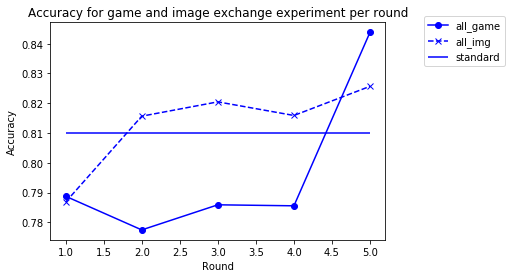

In [88]:
colors = ['blue', 'orange', 'green', 'red', 'purple']
x_range = list(range(1,6))
plot_conds = ['hT_nhT', 'hT_nhF','hF_nhT','hF_nhF', 'all']
plot_conds = ['all']

# Create the hist_means dictionary
hist_means = {condition:[] for condition in accs_hist}
nohist_means = {condition:[] for condition in accs_hist}
for i in range(5):
    experiment = 'games_'+str(i)
    accs_hist, accs_nohist, lengths = print_accs(experiment, print_res=False)
    for condition in accs_hist:
        hist_means[condition].append(accs_hist[condition].mean())
        nohist_means[condition].append(accs_nohist[condition].mean())
    
# Plot the game lines
for i in range(len(plot_conds)):
    condition = list(plot_conds)[i]
    plt.plot(x_range, hist_means[condition], marker='o', label=condition+"_game", color=colors[i])

plt.title("Accuracy for game exchange experiment per round")
plt.ylabel('Accuracy')
plt.xlabel('Round')
plt.legend()
# plt.show()


# Create dicts with the mean accuracies
hist_means = {condition:[] for condition in accs_hist}
nohist_means = {condition:[] for condition in accs_hist}
for i in range(5):
    experiment = 'imgs_'+str(i)
    accs_hist, accs_nohist, lengths = print_accs(experiment, print_res=False)
    for condition in accs_hist:
        hist_means[condition].append(accs_hist[condition].mean())
        nohist_means[condition].append(accs_nohist[condition].mean())
    
# Plot the images mean accuracies
for i in range(len(plot_conds)):
    condition = list(plot_conds)[i]
    plt.plot(x_range, hist_means[condition], marker='x', label=condition+'_img', color=colors[i], linestyle='--')

# Plot the standard results (i.e. 0 or 1)
for i in range(len(plot_conds)):
    condition = list(plot_conds)[i]
    plt.hlines(accs_hist_orig[condition]+(i*.02), 1, 5, color=colors[i], label='standard')

# Plot the random baseline
# plt.hlines(1/6, 1, 5, color='black', label='random')
# plt.hlines(1/12, 1, 5, color='black')
    
plt.title("Accuracy for game and image exchange experiment per round")
plt.ylabel('Accuracy')
plt.xlabel('Round')
plt.legend()
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()   
    

Plot the results including the errorbar

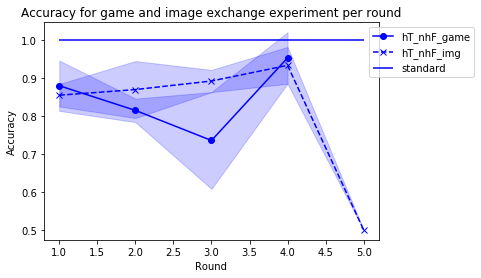

In [112]:
hist_means = {condition:[] for condition in accs_hist}
hist_stds = {condition:[] for condition in accs_hist}

nohist_means = {condition:[] for condition in accs_hist}
colors = ['blue', 'orange', 'green', 'red', 'purple']
x_range = list(range(1,6))
plot_conds = ['hT_nhT', 'hT_nhF','hF_nhT','hF_nhF', 'all']
plot_conds = ['all']
plot_conds = ['h_nh_all']
plot_conds = ['hT_nhT']
plot_conds = ['hT_nhF']
# plot_conds = ['hT_nhF', 'hT_nhT']

# Create the hist_means dictionary
for i in range(5):
    experiment = 'games_'+str(i)
    accs_hist, accs_nohist, lengths = print_accs(experiment, print_res=False)
    for condition in accs_hist:
        hist_means[condition].append(accs_hist[condition].mean())
        hist_stds[condition].append(accs_hist[condition].std())
    
# Plot the game lines
for i in range(len(plot_conds)):
    condition = list(plot_conds)[i]
    plt.plot(x_range, hist_means[condition], marker='o', label=condition+"_game", color=colors[i])
    plt.fill_between(x_range, np.array(hist_means[condition])-np.array(hist_stds[condition]), np.array(hist_means[condition])+np.array(hist_stds[condition]),
                     color=colors[i], alpha=.2)

plt.title("Accuracy for game exchange experiment per round")
plt.ylabel('Accuracy')
plt.xlabel('Round')
plt.legend()
# plt.show()


# Create dicts with the mean accuracies
hist_means = {condition:[] for condition in accs_hist}
hist_stds = {condition:[] for condition in accs_hist}
for i in range(5):
    experiment = 'imgs_'+str(i)
    accs_hist, accs_nohist, lengths = print_accs(experiment, print_res=False)
    for condition in accs_hist:
        hist_means[condition].append(accs_hist[condition].mean())
        hist_stds[condition].append(accs_hist[condition].std())
    
# Plot the images mean accuracies
for i in range(len(plot_conds)):
    condition = list(plot_conds)[i]
    plt.plot(x_range, hist_means[condition], marker='x', label=condition+'_img', color=colors[i], linestyle='--')
    plt.fill_between(x_range, np.array(hist_means[condition])-np.array(hist_stds[condition]), np.array(hist_means[condition])+np.array(hist_stds[condition]),
                    color=colors[i], alpha=.2)

# Plot the standard results (i.e. 0 or 1)
for i in range(len(plot_conds)):
    condition = list(plot_conds)[i]
    plt.hlines(accs_hist_orig[condition]+(i*.02), 1, 5, color=colors[i], label='standard')

# Plot the random baseline
# plt.hlines(1/6, 1, 5, color='black', label='random')
# plt.hlines(1/12, 1, 5, color='black')
    
plt.title("Accuracy for game and image exchange experiment per round")
plt.ylabel('Accuracy')
plt.xlabel('Round')
plt.legend()
plt.legend(bbox_to_anchor=(1.3, 1.00))
plt.show()   
    

## TODO: run a paired anova over the results per experiment, using results from the dataframe